In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [ ]:
df = pd.read_csv("phone_data.csv")
df.head()

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

C:\Users\DK2012 TX\AppData\Local\Temp\ipykernel_7444\863029101.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,index,duration,item,month,network,network_type
date,,,,,,
2014-10-15 06:58:00,0,34.429,data,2014-11,data,data
2014-10-15 06:58:00,1,13.000,call,2014-11,Vodafone,mobile
2014-10-15 14:46:00,2,23.000,call,2014-11,Meteor,mobile
2014-10-15 14:48:00,3,4.000,call,2014-11,Tesco,mobile
2014-10-15 17:27:00,4,4.000,call,2014-11,Tesco,mobile


In [4]:
def classify_duration(x):
    if x < 1:
        return 'short'
    elif x <= 5:
        return 'medium'
    else:
        return 'long'

df['call_type'] = df['duration'].apply(classify_duration)
df.head()

,index,duration,item,month,network,network_type,call_type
date,,,,,,,
2014-10-15 06:58:00,0,34.429,data,2014-11,data,data,long
2014-10-15 06:58:00,1,13.000,call,2014-11,Vodafone,mobile,long
2014-10-15 14:46:00,2,23.000,call,2014-11,Meteor,mobile,long
2014-10-15 14:48:00,3,4.000,call,2014-11,Tesco,mobile,medium
2014-10-15 17:27:00,4,4.000,call,2014-11,Tesco,mobile,medium


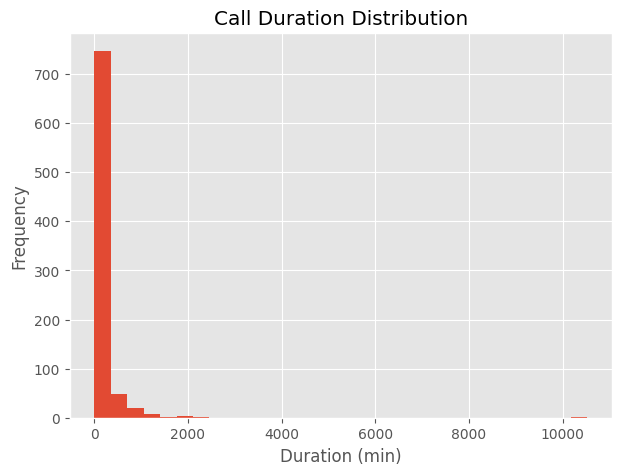

In [5]:
plt.figure(figsize=(7,5))
plt.hist(df['duration'], bins=30)
plt.xlabel("Duration (min)")
plt.ylabel("Frequency")
plt.title("Call Duration Distribution")
plt.show()

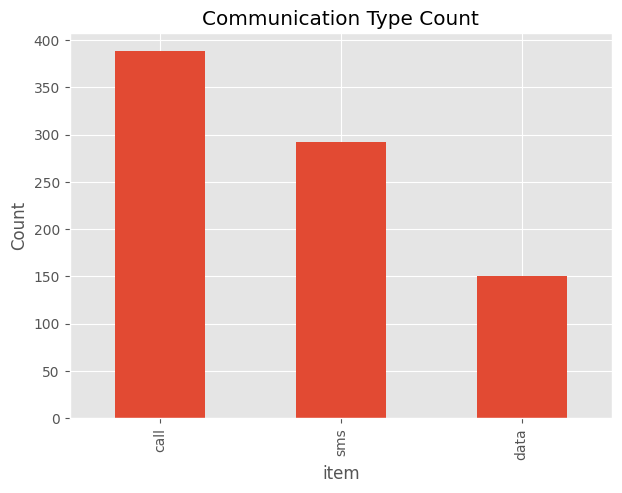

In [6]:
plt.figure(figsize=(7,5))
df['item'].value_counts().plot(kind='bar')
plt.title("Communication Type Count")
plt.ylabel("Count")
plt.show()

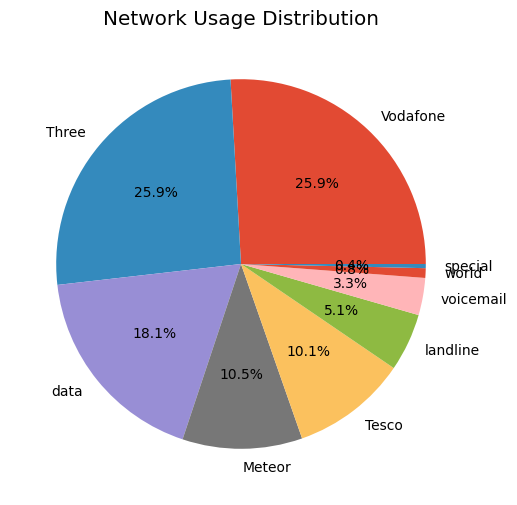

In [7]:
plt.figure(figsize=(6,6))
df['network'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Network Usage Distribution")
plt.ylabel("")
plt.show()

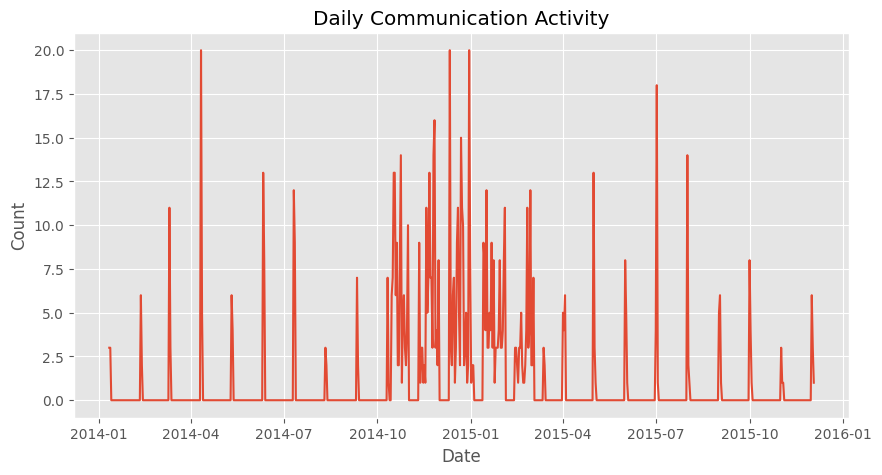

In [8]:
daily_counts = df.resample('D')['item'].count()

plt.figure(figsize=(10,5))
plt.plot(daily_counts)
plt.title("Daily Communication Activity")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

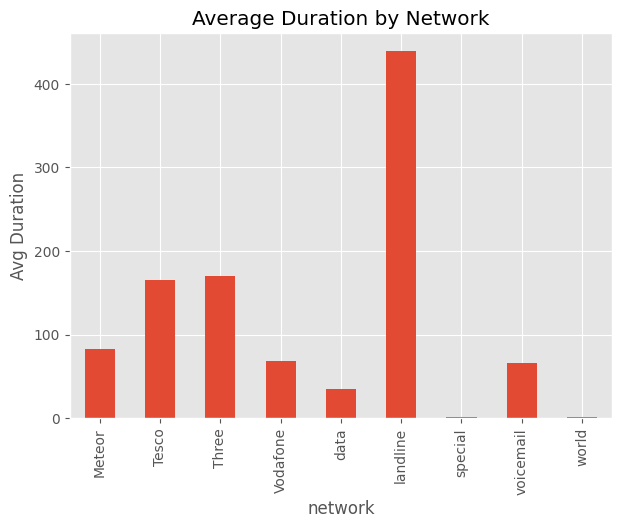

In [9]:
network_avg = df.groupby('network')['duration'].mean()

plt.figure(figsize=(7,5))
network_avg.plot(kind='bar')
plt.title("Average Duration by Network")
plt.ylabel("Avg Duration")
plt.show()

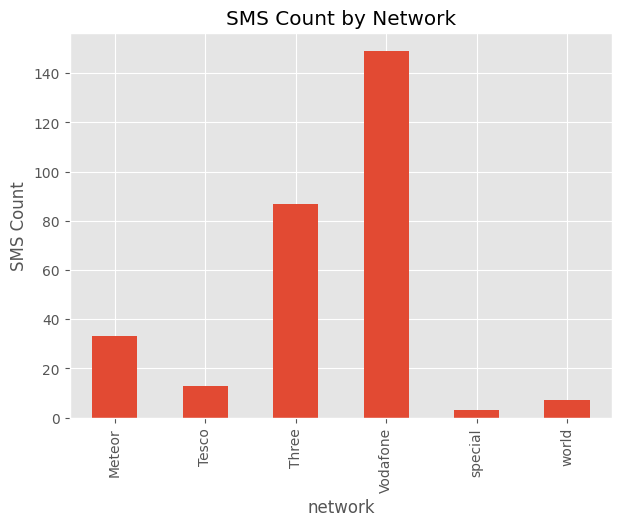

In [10]:
sms_counts = df[df['item'] == 'sms'].groupby('network')['item'].count()

plt.figure(figsize=(7,5))
sms_counts.plot(kind='bar')
plt.title("SMS Count by Network")
plt.ylabel("SMS Count")
plt.show()

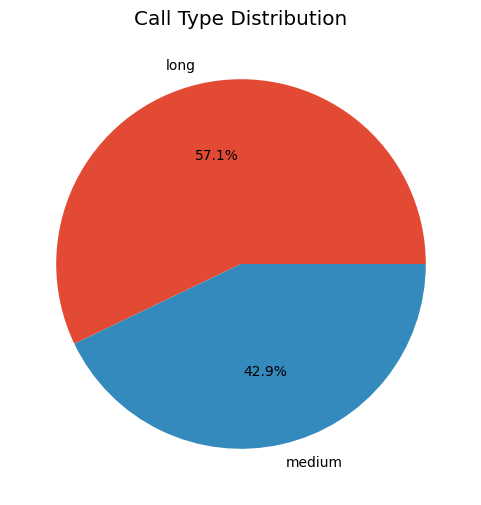

In [11]:
plt.figure(figsize=(6,6))
df['call_type'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Call Type Distribution")
plt.ylabel("")
plt.show()

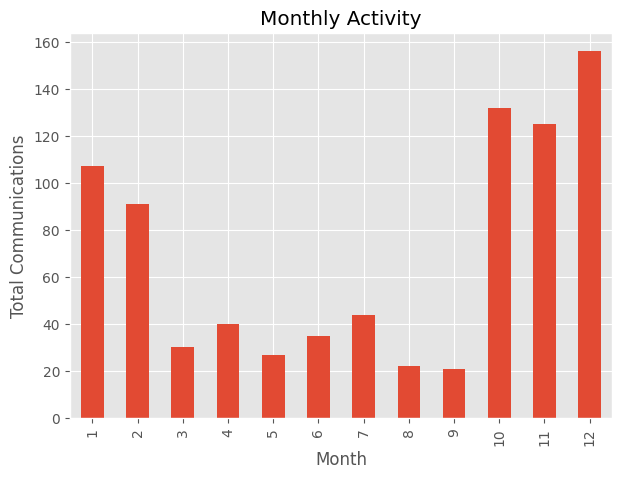

In [12]:
df['month'] = df.index.month
month_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(7,5))
month_counts.plot(kind='bar')
plt.title("Monthly Activity")
plt.xlabel("Month")
plt.ylabel("Total Communications")
plt.show()

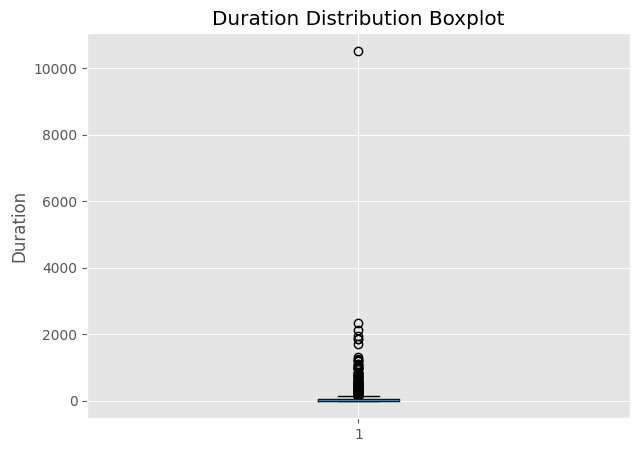

In [13]:
plt.figure(figsize=(7,5))
plt.boxplot(df['duration'])
plt.title("Duration Distribution Boxplot")
plt.ylabel("Duration")
plt.show()

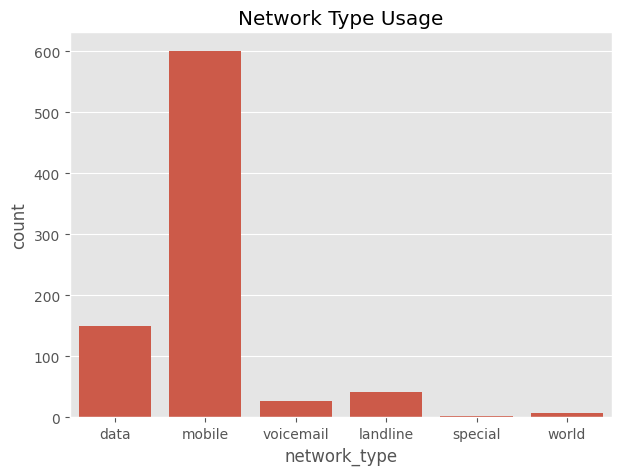

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='network_type')
plt.title("Network Type Usage")
plt.show()

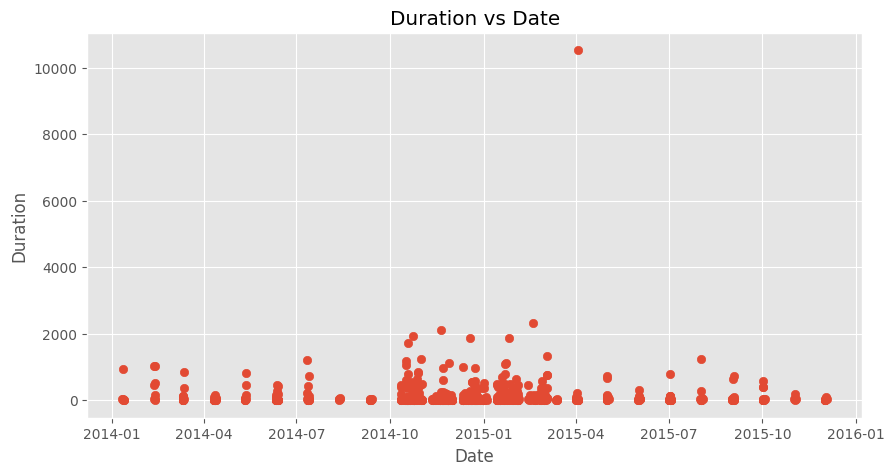

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(df.index, df['duration'])
plt.title("Duration vs Date")
plt.xlabel("Date")
plt.ylabel("Duration")
plt.show()

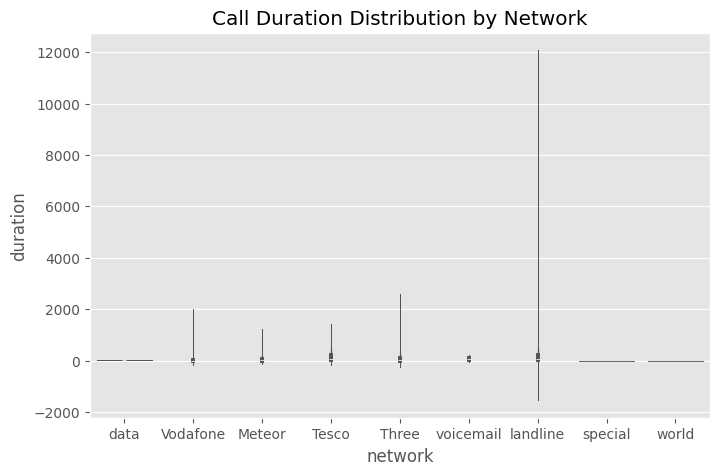

In [16]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='network', y='duration')
plt.title("Call Duration Distribution by Network")
plt.show()

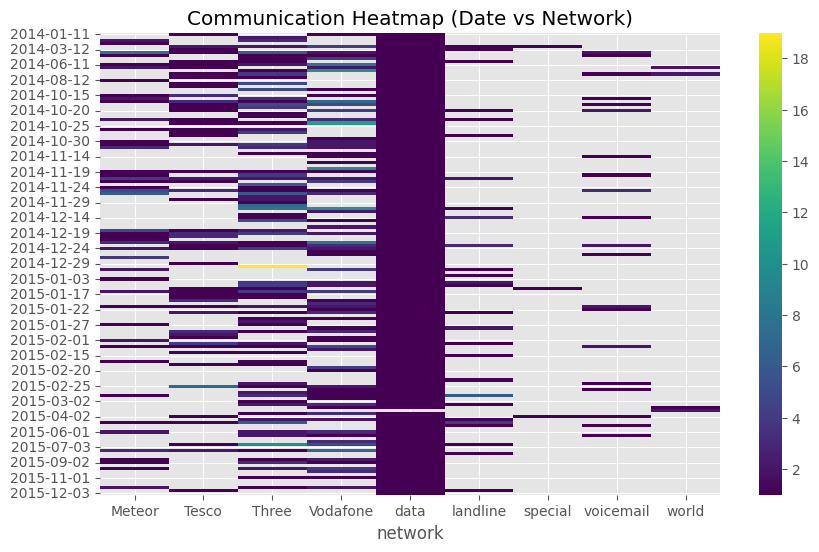

In [18]:
heat = df.pivot_table(
    index=df.index.date,
    columns='network',
    values='duration',
    aggfunc='count'
)

plt.figure(figsize=(10,6))
sns.heatmap(heat, cmap='viridis')
plt.title("Communication Heatmap (Date vs Network)")
plt.show()


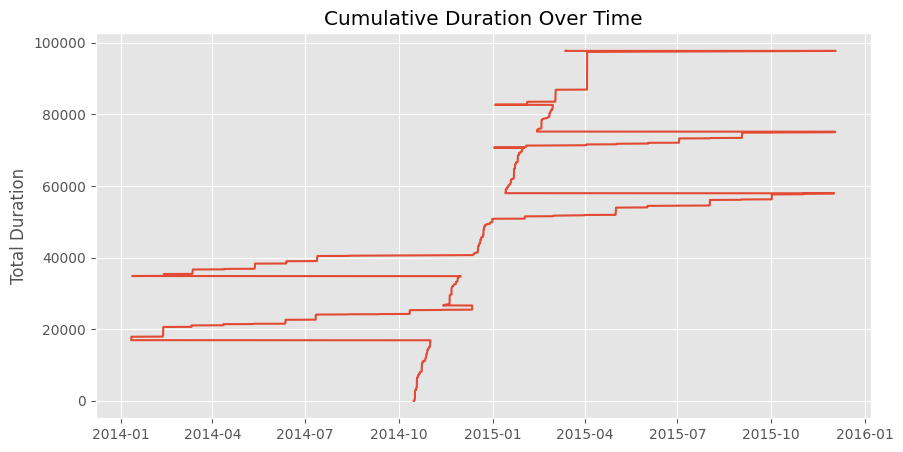

In [19]:
cum_duration = df['duration'].cumsum()

plt.figure(figsize=(10,5))
plt.plot(cum_duration)
plt.title("Cumulative Duration Over Time")
plt.ylabel("Total Duration")
plt.show()

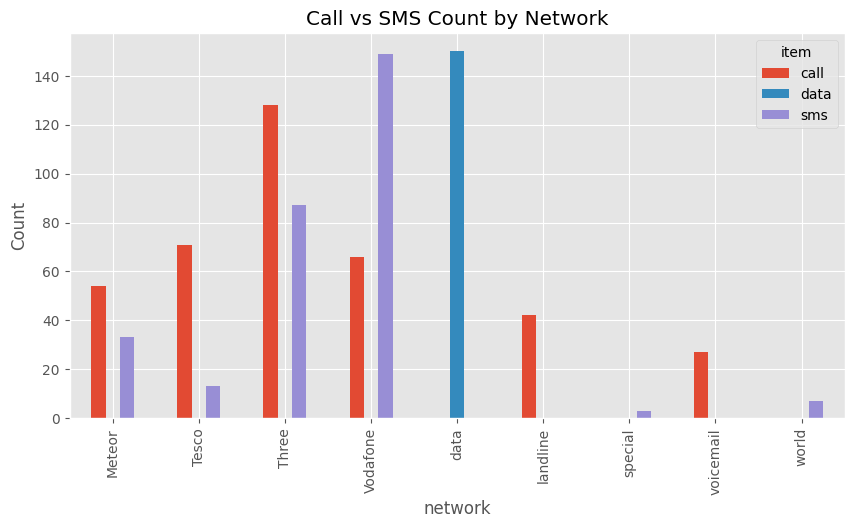

In [20]:
net_compare = df.groupby(['network', 'item']).size().unstack()

net_compare.plot(kind='bar', figsize=(10,5))
plt.title("Call vs SMS Count by Network")
plt.ylabel("Count")
plt.show()

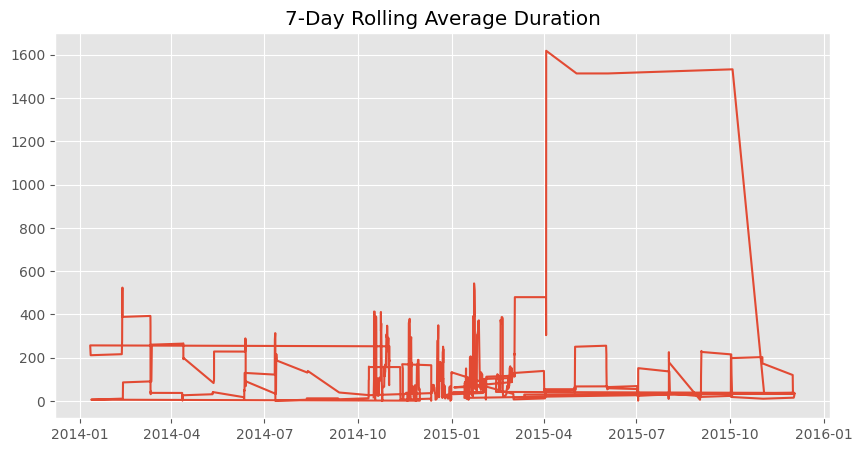

In [21]:
rolling = df['duration'].rolling(window=7).mean()

plt.figure(figsize=(10,5))
plt.plot(rolling)
plt.title("7-Day Rolling Average Duration")
plt.show()

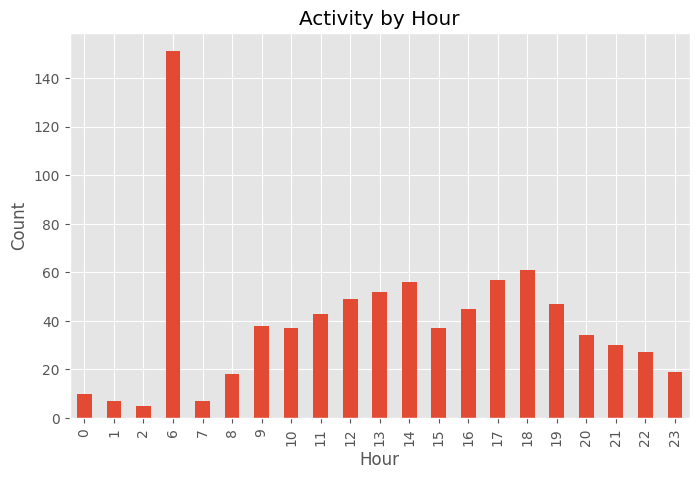

In [22]:
df['hour'] = df.index.hour
hour_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(8,5))
hour_counts.plot(kind='bar')
plt.title("Activity by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

C:\Users\DK2012 TX\AppData\Local\Temp\ipykernel_7444\834956430.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['network'] == n]['duration'], label=n)
C:\Users\DK2012 TX\AppData\Local\Temp\ipykernel_7444\834956430.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['network'] == n]['duration'], label=n)
C:\Users\DK2012 TX\AppData\Local\Temp\ipykernel_7444\834956430.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['network'] == n]['duration'], label=n)


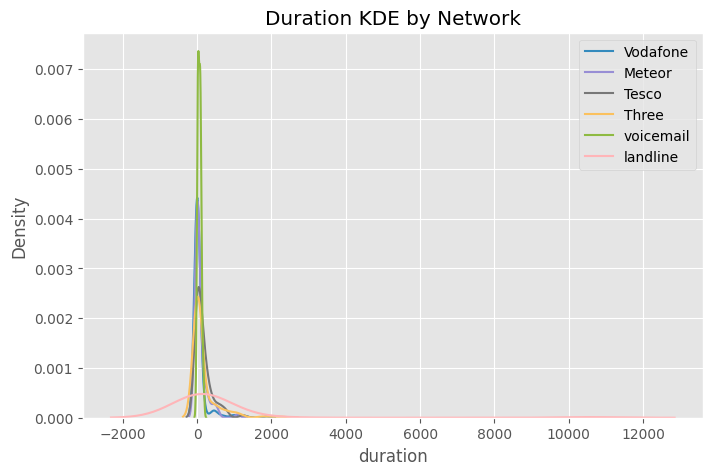

In [23]:
plt.figure(figsize=(8,5))
for n in df['network'].unique():
    sns.kdeplot(df[df['network'] == n]['duration'], label=n)

plt.title("Duration KDE by Network")
plt.legend()
plt.show()

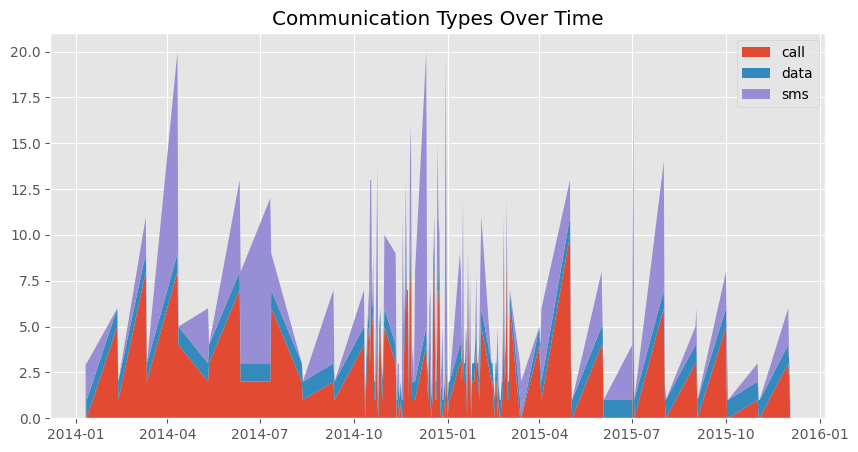

In [24]:
area_df = df.groupby([df.index.date, 'item']).size().unstack().fillna(0)

plt.figure(figsize=(10,5))
plt.stackplot(area_df.index, area_df.T)
plt.title("Communication Types Over Time")
plt.legend(area_df.columns)
plt.show()

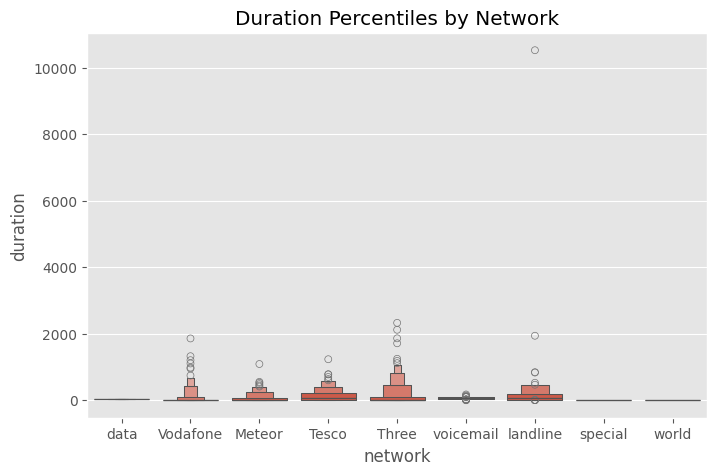

In [25]:
plt.figure(figsize=(8,5))
sns.boxenplot(data=df, x='network', y='duration')
plt.title("Duration Percentiles by Network")
plt.show()

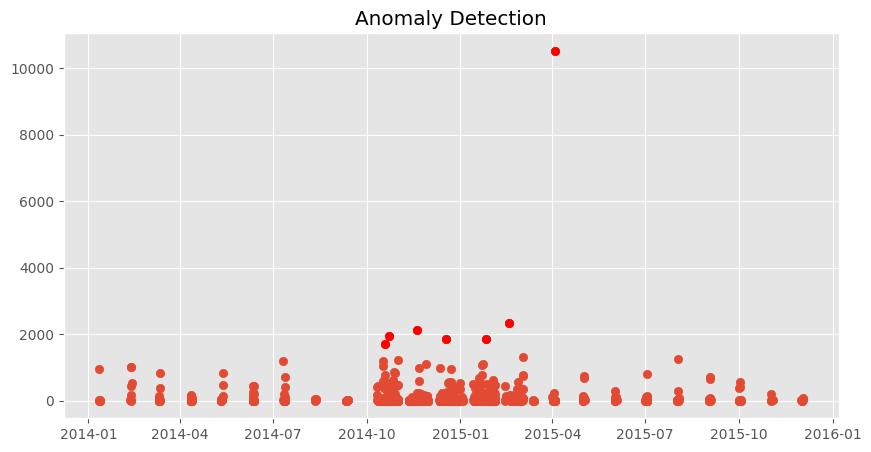

In [26]:
mean = df['duration'].mean()
std = df['duration'].std()
threshold = mean + 3*std

anomalies = df[df['duration'] > threshold]

plt.figure(figsize=(10,5))
plt.scatter(df.index, df['duration'])
plt.scatter(anomalies.index, anomalies['duration'], color='red')
plt.title("Anomaly Detection")
plt.show()

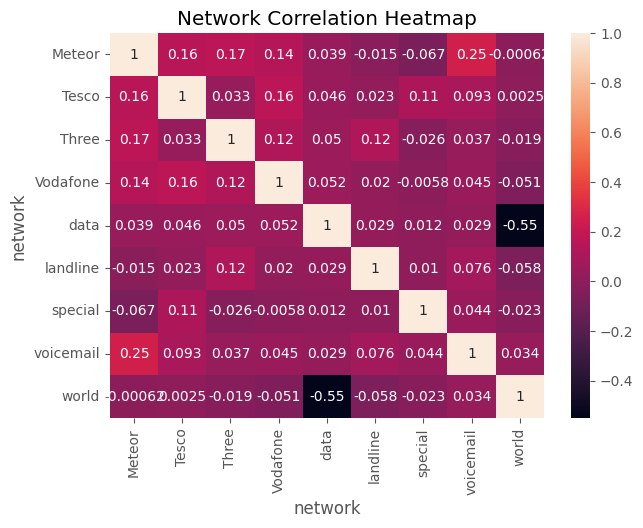

In [27]:
corr_df = df.groupby([df.index.date, 'network']).size().unstack().fillna(0)
plt.figure(figsize=(7,5))
sns.heatmap(corr_df.corr(), annot=True)
plt.title("Network Correlation Heatmap")
plt.show()

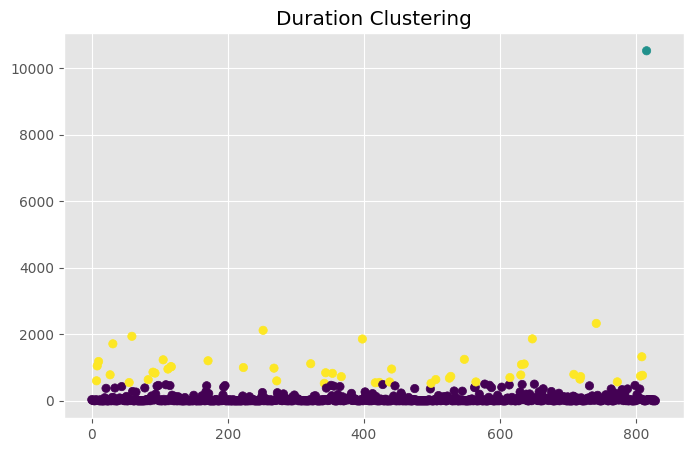

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['duration']])

plt.figure(figsize=(8,5))
plt.scatter(df.index, df['duration'], c=df['cluster'])
plt.title("Duration Clustering")
plt.show()